In [195]:
import numpy as np
import matplotlib.pyplot as plt
from hdf5manager import hdf5manager as h5
import scipy.ndimage.filters as filters
import scipy.ndimage as ndimage
import scipy
from skimage.measure import label, regionprops
from scipy.ndimage.filters import gaussian_filter, convolve
from skimage.morphology import disk, watershed
from skimage.morphology import erosion, dilation, opening, closing
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion
from scipy.ndimage.filters import maximum_filter
from opticFlow import opticFlow as of
import colorsys
import wholeBrain as wb
import cv2

In [196]:
path = '/Users/shreyamantripragada/Documents/test_angs_mags.hdf5'

h = h5(path) 
print(h.keys())
print(h.keys()[2])
print(dir(h))
mov = h.load('mags')
# angs = h.load('rot_angs')
# start_stop = h.load('start_stop_index')

['start_stop_index', 'dfof', 'mags', 'rot_angs']
mags
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'close', 'keys', 'load', 'open', 'path', 'print', 'save', 'verbose']


In [197]:
print(mov.shape)

(4000, 105, 141)


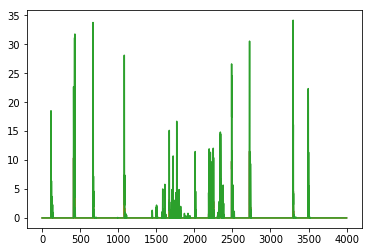

In [198]:
mean = np.mean(mov, axis = (1, 2))
standardDev = np.std(mov, axis = (1, 2))
average = np.average(mov, axis = (1, 2))
plt.plot(mean)
plt.plot(average)
plt.plot(standardDev)

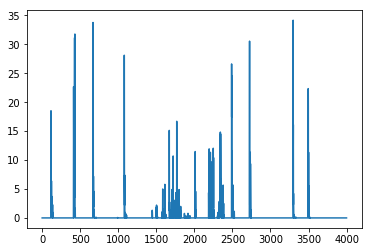

In [199]:
standardDev = np.std(mov, axis = (1, 2))
plt.plot(standardDev)

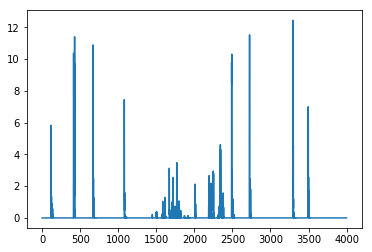

In [200]:
average = np.average(mov, axis = (1, 2))
plt.plot(average)

In [201]:
wb.playMovie(mov)


Playing Movie
-----------------------
preprocessing data...
Pre-processing movie rescaling...

Rescaling Movie
-----------------------
mean: 0.09717086151820375 low: 3 high: 7 std: 2.3813770774755803
newMin: -7.046960370908537
newMax 16.766810403847266
amin 0.0
amax 407.083147251264
newSlope: 15.20861713456773


Movie range normalization: 2.0425251019987627
starting video playback..




(-0.5, 140.5, 104.5, -0.5)

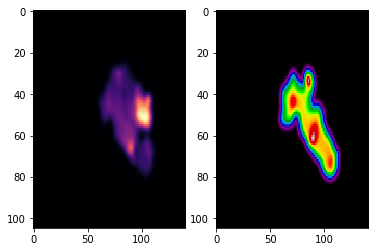

In [202]:
fig,axs = plt.subplots(1, 2)
axs[0].imshow(mov[431], aspect = "auto", cmap = "magma")
axs[0].axis("on")
axs[1].imshow(mov[434], aspect = "auto", cmap = "nipy_spectral")
axs[1].axis("on")
#plt.colorbar()

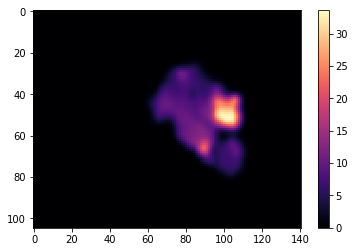

In [203]:
plt.imshow(mov[431], aspect = "auto", cmap = "magma")
plt.colorbar()

In [204]:
def localMaxima2d(array_2d):
    # finds local maxima of a given 2d array
    neighborhood = np.ones((5,5))
    local_max = maximum_filter(array_2d, footprint=neighborhood)==array_2d
    background = (array_2d==0)
    eroded_background = binary_erosion(background, structure=neighborhood, border_value=1)
    lmax = local_max ^ eroded_background
    return lmax

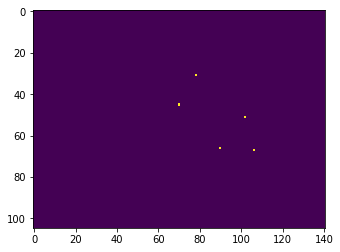

In [205]:
for i, frame in enumerate(mov[430:432]):
    fmax = localMaxima2d(frame)
    #fmax1 = label(fmax)
    #fmax.axis("off")
    plt.imshow(fmax)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5393333146154218, 1.8812315421988537, 5.831614083963566, 2.655092081754685, 2.222759005750446, 1.1911884787114078, 0.17343143010936612, 0.540215484357613, 1.3583825188043837, 1.2445611879657308, 0.29628813980963137, 0.9205346520709573, 0.020982393144313168, 0.00616923286801293, 0.855312649908198, 0.0, 0.0, 0.009272536503547996, 0.0, 0.0, 0.0, 0.0, 0.14399755691121213, 0.5809848476849229, 0.0039049769526838824, 0.23094855997

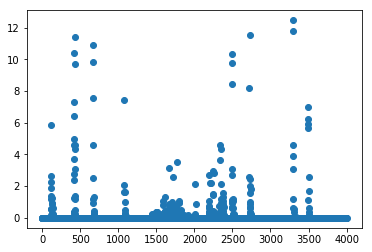

In [206]:
#includes 0s with the means
def findMeans(array_3d):
    all_means = []
    x = []
    for i, frame in enumerate(array_3d):
        all_means.append(np.mean(frame))
        x.append(i)
    plt.scatter(x, all_means)
    return all_means

amount = findMeans(mov)
print (amount)

In [256]:
#includes 0s with the standard deviation
def standardDeviation(array_3d):
    all_deviations = []
    x = []
    for i, frame in enumerate(array_3d):
        mean = np.mean(frame)
        x.append(i)
        deviation = 0
        deviations = []
        for r in frame:
            for c in range(len(r)):
                deviations.append((r[c] - mean) ** 2)
        mean1 = np.mean(deviations)
        current_deviation = mean1 ** (1/2)
        all_deviations.append(current_deviation)
    #plt.plot(x, all_deviations, "bo")
    return all_deviations

    
standardDev = standardDeviation(mov)
print (standardDev)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.4397693574518797, 6.507647421026223, 18.52093292975131, 9.241054781597828, 6.459278337419307, 3.699959159874099, 0.9670524393192281, 1.93793971887465, 6.391794914013734, 4.596814332101958, 1.1717480158237499, 3.7313736634695838, 0.22174517663514673, 0.09379365356639636, 3.477197669826565, 0.0, 0.0, 0.12425853146605984, 0.0, 0.0, 0.0, 0.0, 0.9076449674061343, 2.2775787943722627, 0.05917929139184669, 0.9593379399977475, 0.199

In [209]:
def return_dfof(amount):
    return amount

value_dfof = return_dfof(dfof)
print(value_dfof)
print(len(value_dfof))

[-0.13750606 -0.12996966 -0.12050748 ...  0.02925072  0.01660987
  0.01909497]
1334



/Users/shreyamantripragada/Documents/test_angs_mags.hdf5 has the following keys:
	- dfof
	- mags
	- rot_angs
/Users/shreyamantripragada/Documents/test_angs_mags.hdf5 has the following attributes:
	- start_stop_index



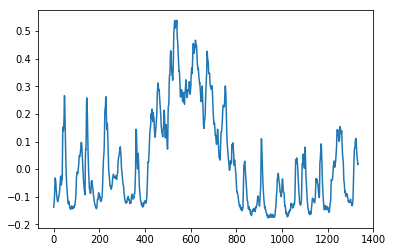

In [210]:
path2 = '/Users/shreyamantripragada/Documents/brain_data.hdf5'

k = h5(path2)
k.keys()
dfof = k.load('dfof_mean')
h.save({'dfof':dfof})

plt.plot(dfof)

(4000, 105, 141)


Text(0.5, 0, 'Time')

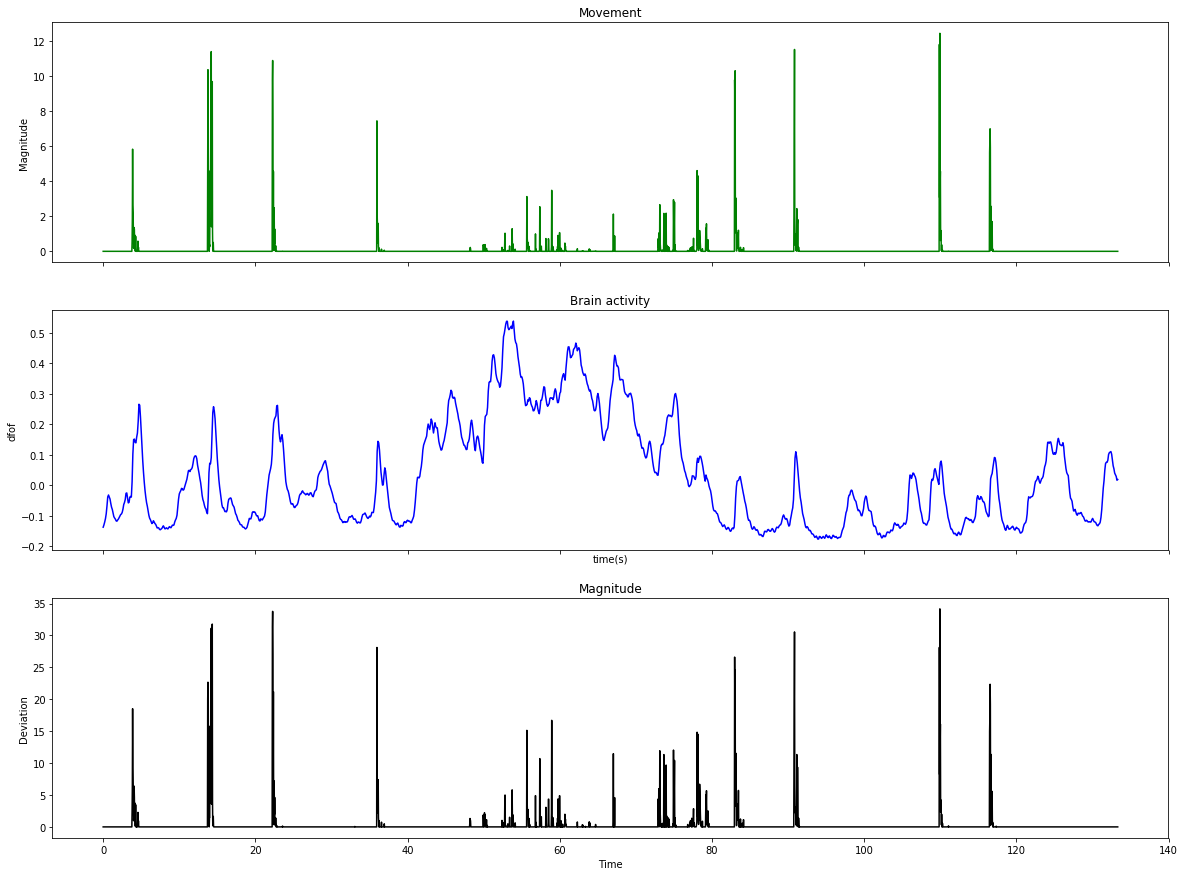

In [211]:
print (mov.shape)
mean = np.mean(mov, axis = (1, 2))
standardDev = np.std(mov, axis = (1, 2))
fig, axis = plt.subplots(3, figsize = (20, 15), sharex = True)


time = np.arange(dfof.shape[0])/10
time2 = np.arange(mean.shape[0])/30
time3 = np.arange(standardDev.shape[0])/30

#graphing the mean graph 
axis[0].plot(time2, mean, color = 'g')
axis[0].set_ylabel('Magnitude')
axis[0].set_title('Movement')

#graphing the dfof(brain activity) graph
axis[1].plot(time, dfof, color = 'b')
axis[1].set_ylabel('dfof')
axis[1].set_xlabel('time(s)')
axis[1].set_title('Brain activity')

#graphing the standard deviation graph
axis[2].plot(time3, standardDev, color = 'k')
axis[2].set_title('Magnitude')
axis[2].set_ylabel('Deviation')
axis[2].set_xlabel('Time')

Displays the dips in the graph, using derivatives


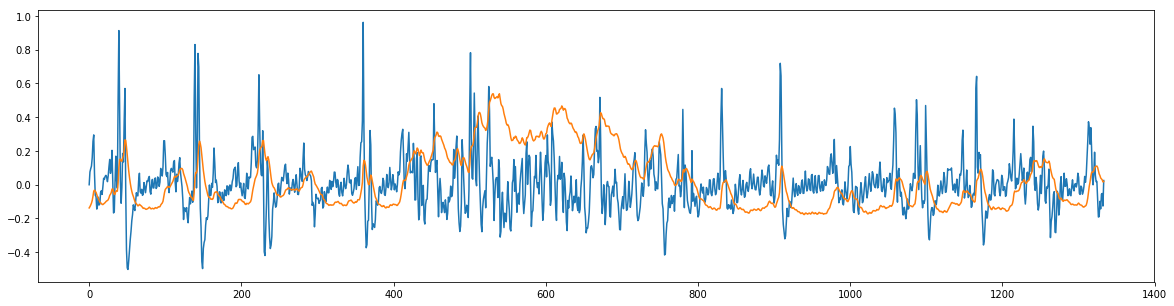

In [212]:
#prints out the dips of the graph, using derivatives 
#print (mov.shape)
print ("Displays the dips in the graph, using derivatives")

fig, axis = plt.subplots(1, figsize = (20, 5), sharex = True)
der = np.zeros_like(dfof)
time = np.arange(der.shape[0])/10

for i, j in enumerate(dfof):
    if i == 0 or i == dfof.shape[0]:
        continue
    else:
        der[i] = j - dfof[i-1]
plt.plot(der/.1)
plt.plot(dfof)
#plt.xlim([0, 200])

Displays the dips in the graph, using the derivative line


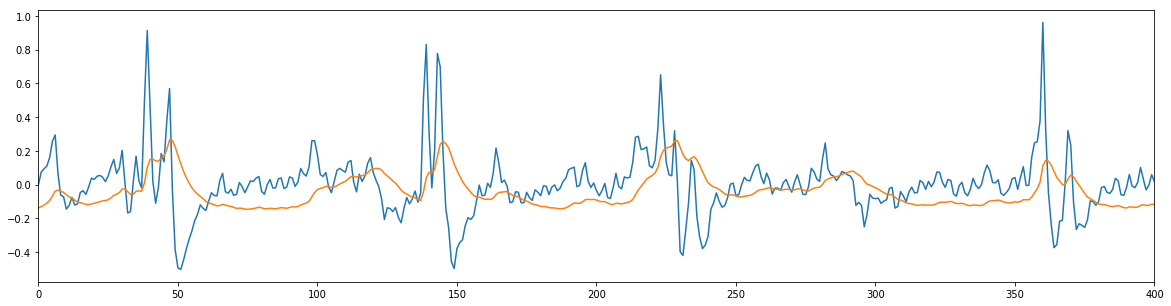

In [213]:
#print (mov.shape)
print ("Displays the dips in the graph, using the derivative line")

fig, axis = plt.subplots(1, figsize = (20, 5))
time = np.arange(der.shape[0])/10

for i, j in enumerate(dfof):
    if i == 0 or i == dfof.shape[0]:
        continue
    else:
        der[i] = j - dfof[i-1]
plt.plot(der/.1)
plt.plot(dfof)
value = plt.xlim([0, 400])

Displays the dips in the graph, using derivatives
The graph is the original brain data and derivation line, but from [0, 150] and draws lines of either green(increasing) or red(decreasing)depending on the point of the graph. 


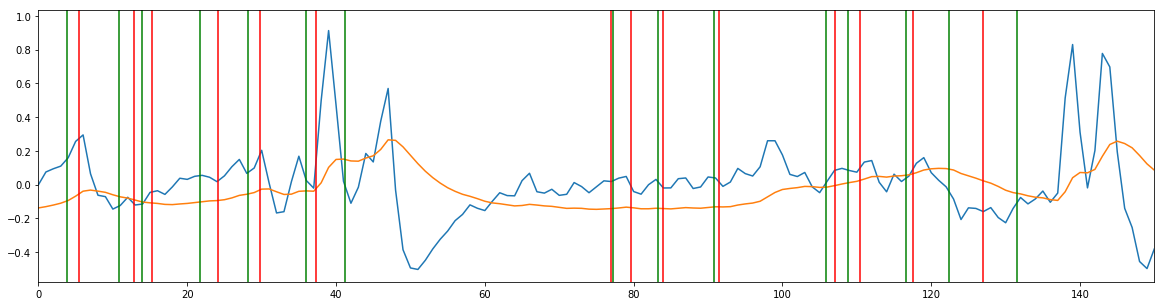

In [215]:
#print (mov.shape)
print ("Displays the dips in the graph, using derivatives")
print ("The graph is the original brain data and derivation line, but from [0, 150] and draws lines of either green(increasing) or red(decreasing)" + 
       "depending on the point of the graph. ")

der = np.zeros_like(dfof)*10
# Brain Activity Boundaries
for i, val in enumerate(dfof):
    if i == 0 or i == dfof.shape[0]:
        continue
    else:
        der[i] = val - dfof[i-1]
der *= 10

d_switch = []
u_switch = []

# Derivative of the graph by points
for i, val in enumerate(dfof):
    if i == 0 or i == dfof.shape[0]:
        continue
    elif (val > 0) and (dfof[i-1] < 0):
        u_switch.append(i)
    elif (val < 0) and (dfof[i-1] > 0):
        d_switch.append(i)

u_switch = np.array(u_switch)/10
d_switch = np.array(d_switch)/10

time = np.arange(der.shape[0])/10

fig, axis = plt.subplots(1, figsize = (20, 5))
time = np.arange(der.shape[0])/10

for i, j in enumerate(dfof):
    if i == 0 or i == dfof.shape[0]:
        continue
    else:
        der[i] = j - dfof[i-1]
plt.plot(der/.1)
plt.xlim([0, 400])
plt.plot(dfof)

#plt.plot(time, der/.1, color = 'k')
for line in u_switch:
    go_up = plt.axvline(x = line, color='g')
for line in d_switch:
    go_down = plt.axvline(line, color='r')
plt.xlim([0,150])
plt.show()




In [216]:
time[-1]

133.3

In [217]:
import pandas as pd
import numpy as np
from pandas import DataFrame

In [218]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [219]:
df.dtypes

col1    int64
col2    int64
dtype: object

In [220]:
df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['a', 'b', 'c'])
df2

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [221]:
d = {'Mean': [1, 2], 'Range': [3, 4], 'Magnitude':[0, 0], 'DfΔf': [0, 0], 'Dipped Values': [0, 0]}
df = pd.DataFrame(data=d)
df

,Mean,Range,Magnitude,DfΔf,Dipped Values
0,1,3,0,0,0
1,2,4,0,0,0


In [252]:
# values = [ (0, 0, 0, 0, 0, 0, 0, 0, 0) ,
#              (0, 0, 0 , 0, 0, 0, 0, 0, 0) ,
#              (0, 0, 0 , 0, 0, 0, 0, 0, 0),
#              (0, 0, 0 , 0, 0, 0, 0, 0, 0),
#              (0, 0, 0 , 0, 0, 0, 0, 0, 0)]
 
#Create a DataFrame object
dfObj = pd.DataFrame()
dfObj1 = pd.DataFrame()
dfObj2 = pd.DataFrame()
dfObj3 = pd.DataFrame()
#print(len(standardDev))
#print(standardDev)
dfObj['mean_brain'] = amount
dfObj['std_brain'] = standardDev
#dfObj['df/f_brain'] = value_dfof
#pd.concat([dfObj, dfObj1, dfObj2], axis=1)

print(dfObj.loc[100:129,'mean_brain'])
print(dfObj1.loc[100:129, 'std_brain'])
#print(dfObj2.loc[100:129, 'df/f_brain'])

100    0.000000
101    0.000000
102    0.000000
103    0.000000
104    0.000000
105    0.000000
106    0.000000
107    0.000000
108    0.000000
109    0.000000
110    0.000000
111    0.000000
112    0.000000
113    0.000000
114    0.539333
115    1.881232
116    5.831614
117    2.655092
118    2.222759
119    1.191188
120    0.173431
121    0.540215
122    1.358383
123    1.244561
124    0.296288
125    0.920535
126    0.020982
127    0.006169
128    0.855313
129    0.000000
Name: mean_brain, dtype: float64


KeyError: 'std_brain'

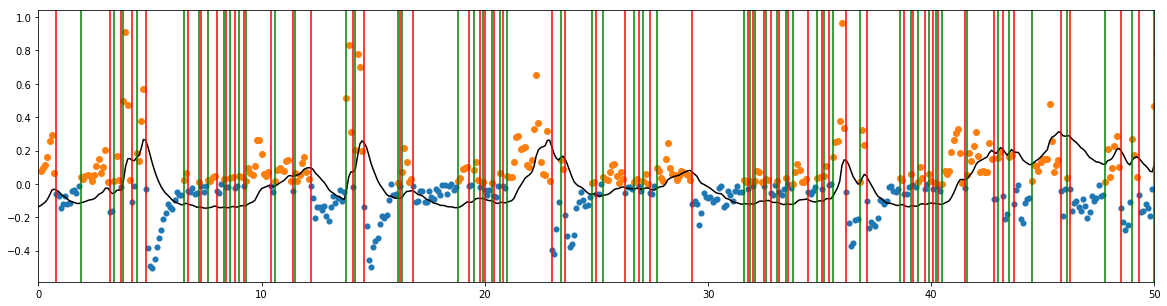

In [223]:
der = np.zeros_like(dfof)*10
# Brain Activity Boundaries
for i, val in enumerate(dfof):
    if i == 0 or i == dfof.shape[0]:
        continue
    else:
        der[i] = val - dfof[i-1]
der *= 10

d_switch = []
u_switch = []
range_list = []
differnce = 0

# Derivative of the graph by points
for i, val in enumerate(der):
    if i == 0 or i == der.shape[0]:
        continue
    elif (val > 0) and (der[i-1] < 0):
        u_switch.append(i)
    elif (val < 0) and (der[i-1] > 0):
        d_switch.append(i)

u_switch = np.array(u_switch)/10
d_switch = np.array(d_switch)/10

time = np.arange(dfof.shape[0])/10
fig, axis = plt.subplots(1, figsize = (20, 5))



# Line-Scatter Graph
plt.scatter(time[der<0], der[der<0], linewidths =0.1)
plt.scatter(time[der>0], der[der>0])
plt.plot(time, dfof, color = 'k')
for line in u_switch:
    plt.axvline(x = line, color='g')
for line in d_switch:
    plt.axvline(line, color='r')
plt.xlim([0,50])
plt.show()


In [253]:
# def calculating_range():
#     range_list = []
#     for value in range(len(u_switch)):
#         for amount in range(len(d_switch)): 
#             difference = d_switch[amount] - u_switch[value]
#             range_list.append(difference)
    
#     return range_list
        

# range_amt = calculating_range()



In [255]:
# values = [ (0, 0, 0, 0, 0, 0, 0, 0, 0) ,
#              (0, 0, 0 , 0, 0, 0, 0, 0, 0) ,
#              (0, 0, 0 , 0, 0, 0, 0, 0, 0),
#              (0, 0, 0 , 0, 0, 0, 0, 0, 0),
#              (0, 0, 0 , 0, 0, 0, 0, 0, 0)]
 
#Create a DataFrame object
dfObj = pd.DataFrame()
dfObj1 = pd.DataFrame()
dfObj2 = pd.DataFrame()
dfObj3 = pd.DataFrame()
#print(len(standardDev))
#print(standardDev)
dfObj['mean_brain'] = amount
dfObj['std_brain'] = standardDev
# dfObj['df/f_brain'] = value_dfof
#dfObj['range_brain'] = range_final


print(dfObj.loc[100:129])
pd.concat([dfObj, dfObj1, dfObj2], axis=1)

print(dfObj.loc[100:129,'mean_brain'])
print(dfObj1.loc[100:129, 'std_brain'])
print(dfObj2.loc[100:129, 'df/f_brain'])

     mean_brain  std_brain
100    0.000000   0.000000
101    0.000000   0.000000
102    0.000000   0.000000
103    0.000000   0.000000
104    0.000000   0.000000
105    0.000000   0.000000
106    0.000000   0.000000
107    0.000000   0.000000
108    0.000000   0.000000
109    0.000000   0.000000
110    0.000000   0.000000
111    0.000000   0.000000
112    0.000000   0.000000
113    0.000000   0.000000
114    0.539333   2.439769
115    1.881232   6.507647
116    5.831614  18.520933
117    2.655092   9.241055
118    2.222759   6.459278
119    1.191188   3.699959
120    0.173431   0.967052
121    0.540215   1.937940
122    1.358383   6.391795
123    1.244561   4.596814
124    0.296288   1.171748
125    0.920535   3.731374
126    0.020982   0.221745
127    0.006169   0.093794
128    0.855313   3.477198
129    0.000000   0.000000
100    0.000000
101    0.000000
102    0.000000
103    0.000000
104    0.000000
105    0.000000
106    0.000000
107    0.000000
108    0.000000
109    0.000000
110

KeyError: 'std_brain'

In [ ]:
def 